## Comparison to non-hydrostatic run

We saw that Astoria runs with linear stratification have lots of internal waves and 3D structure. We ran a non-hydrostatic version of that base case.

In [1]:
import cmocean as cmo
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg
import xarray as xr
import matplotlib.gridspec as gspec

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
sns.set_context('notebook')
sns.set_style('whitegrid')

In [4]:
grid = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/gridGlob.nc')
state = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/stateGlob.nc')

stateNH = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/stateGlob.nc')
gridNH = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/gridGlob.nc')

In [5]:
nz = 104
sb_Ast = 29 # shelf break z-index Astoria

Z = grid.RC[:]
Y = grid.Y[:]
X = grid.X[:]
Depth = grid.Depth[:]
#hfac = np.ma.masked_values(hFac, 0)
#maskC = np.ma.getmask(hfac)
#rA = nbl.variables['rA'][:]

ZNH = gridNH.RC[:]
YNH = gridNH.Y[:]
XNH = gridNH.X[:]
DepthNH = gridNH.Depth[:]

### Cross-shelf structure

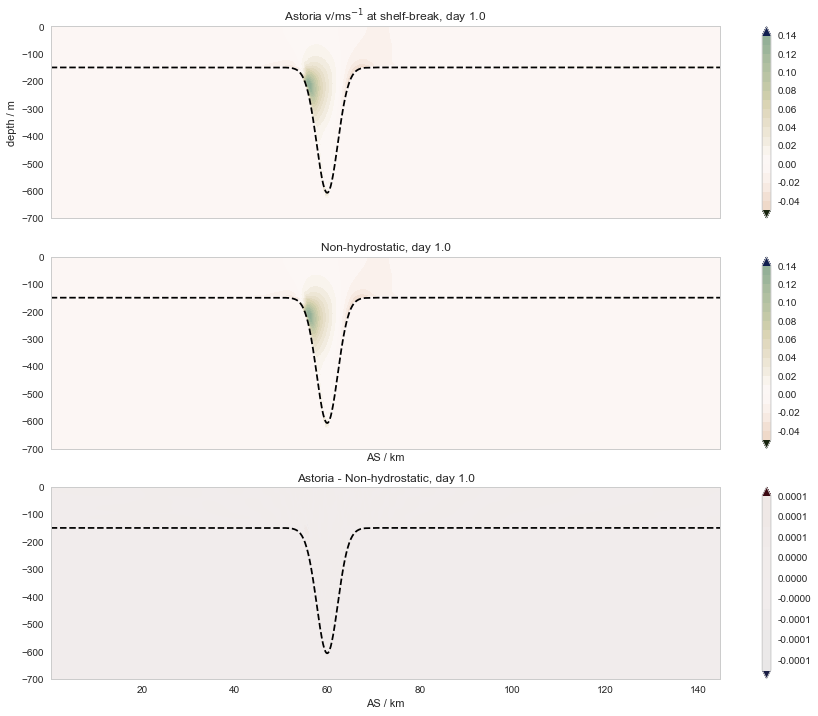

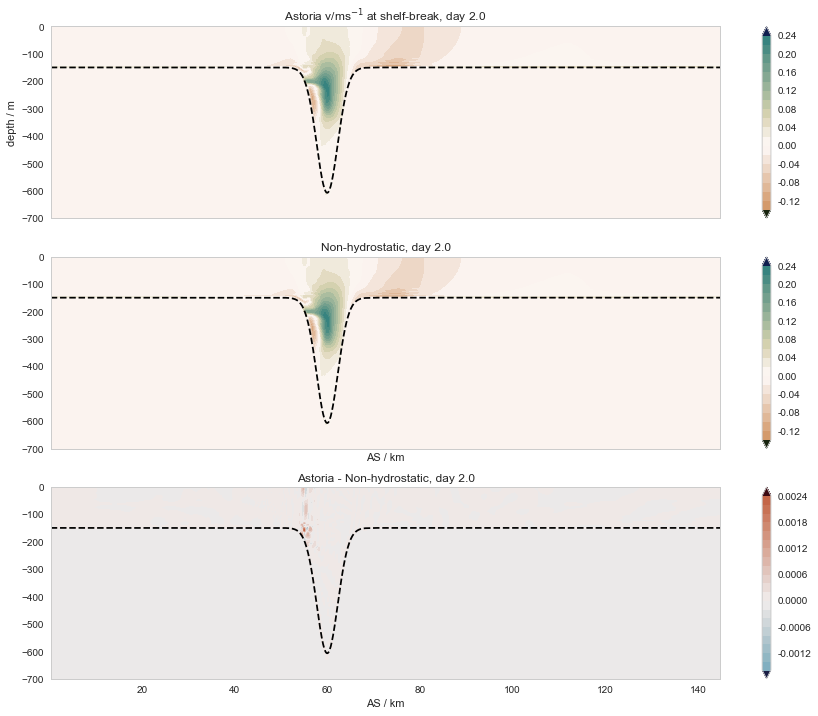

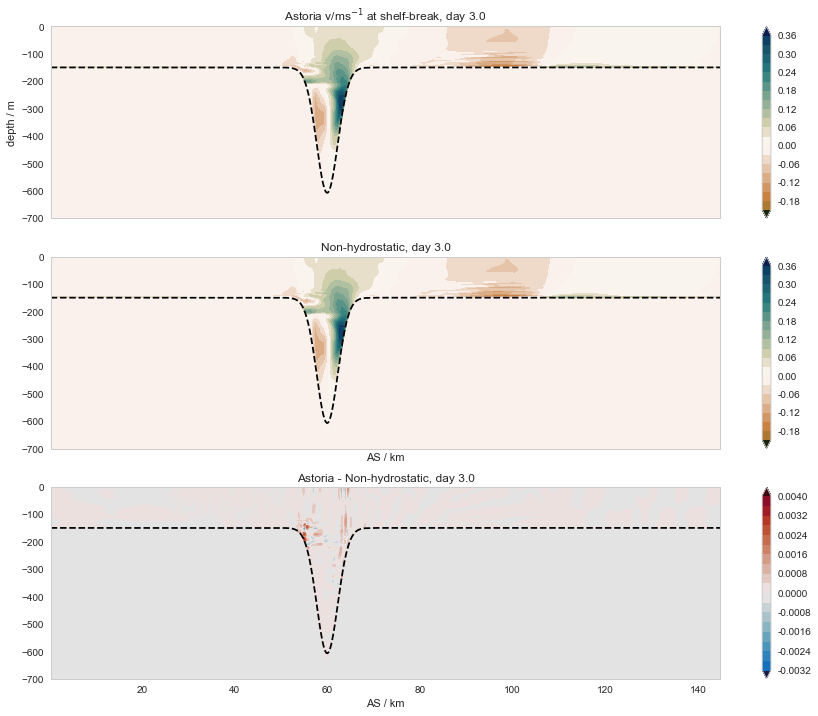

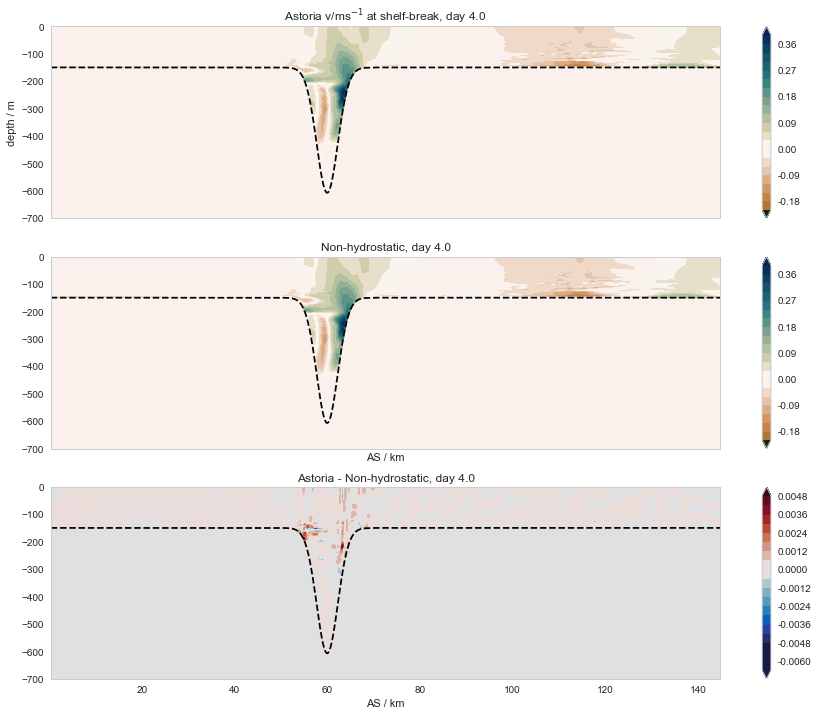

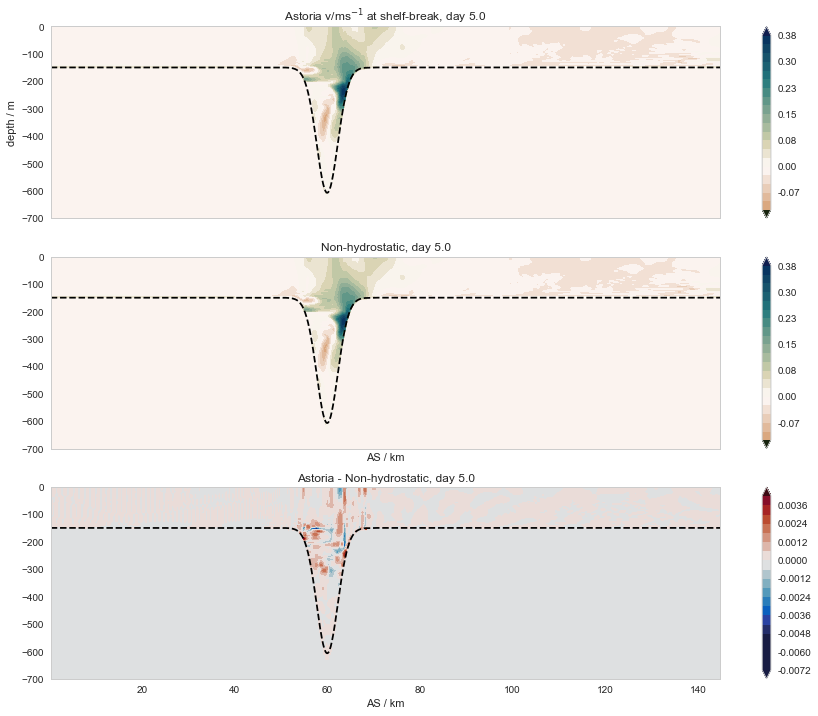

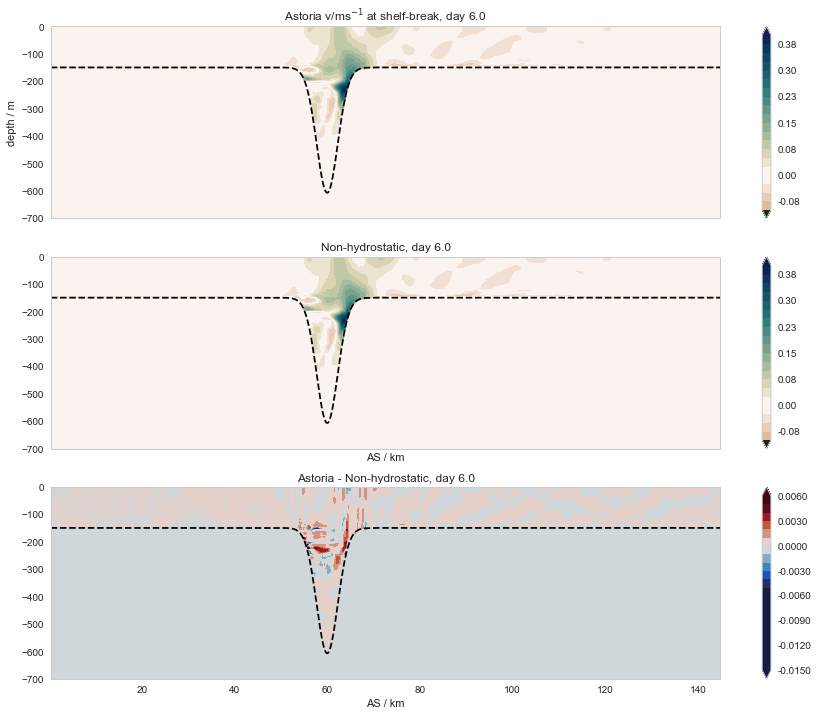

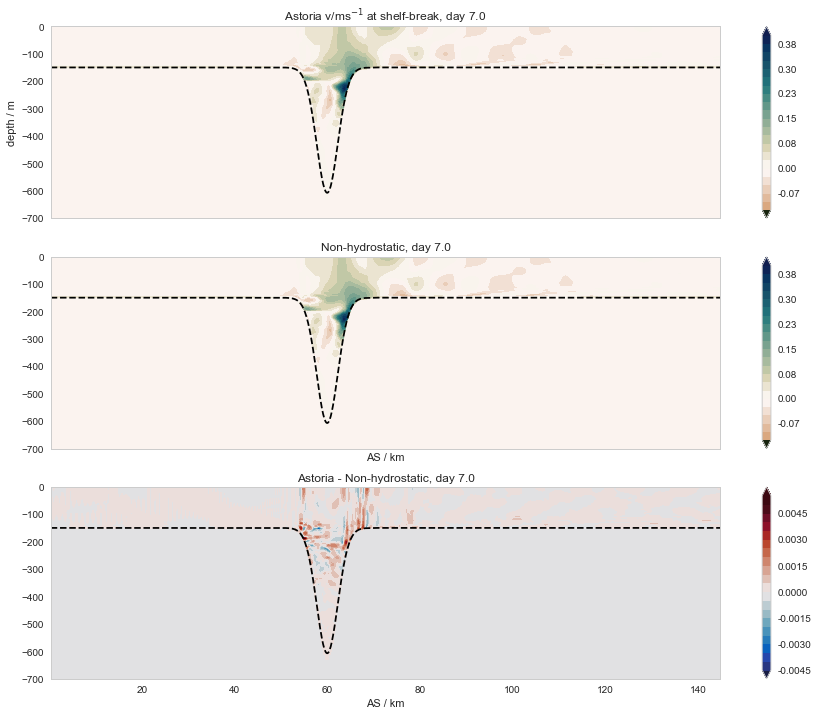

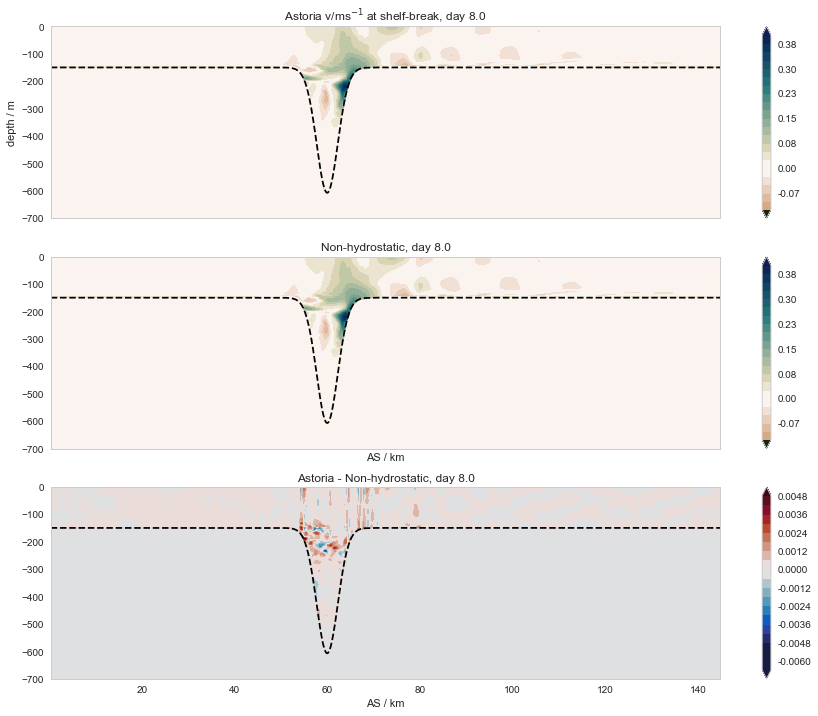

In [6]:
yind = 130
xslice = slice(0,400)

for tt in [2,4,6,8,10,12,14,16]:
    
    VAst = state.V.isel(T=tt,Yp1=yind,X=xslice)
    VAstNH = stateNH.V.isel(T=tt,Yp1=yind,X=xslice)
  
    fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(15,12), sharex = True)

    mesh = ax0.contourf(grid.X[xslice]/1000, grid.RC, VAst,20, 
                        cmap=cmo.cm.tarn, vmin=-0.4, vmax=0.4, extend='both')
    ax0.plot(grid.X[xslice]/1000, -grid.Depth[yind,xslice],'k--')
    ax0.set_ylabel('depth / m')
    ax0.set_ylim(-700,0)
    cb=fig.colorbar(mesh, ax=ax0, format='%.2f')

    mesh = ax1.contourf(gridNH.X[xslice]/1000, gridNH.RC, VAstNH,20, 
                        cmap=cmo.cm.tarn, vmin=-0.4, vmax=0.4, extend='both')
    ax1.plot(gridNH.X[xslice]/1000, -gridNH.Depth[yind,xslice],'k--')
    ax1.set_xlabel('AS / km')
    ax1.set_ylim(-700,0)
    cb=fig.colorbar(mesh, ax=ax1, format='%.2f')

    mesh = ax2.contourf(gridNH.X[xslice]/1000, gridNH.RC, VAst-VAstNH,20, cmap=cmo.cm.balance,
                        vmin=-0.005, vmax=0.005, extend='both')
    ax2.plot(gridNH.X[xslice]/1000, -gridNH.Depth[yind,xslice],'k--')
    ax2.set_xlabel('AS / km')
    ax2.set_ylim(-700,0)
    cb=fig.colorbar(mesh, ax=ax2, format='%.4f')

      
    ax0.set_title(r'Astoria v/ms$^{-1}$ at shelf-break, day %1.1f' %(tt/2))
    ax1.set_title('Non-hydrostatic, day %1.1f' %(tt/2))
    ax2.set_title('Astoria - Non-hydrostatic, day %1.1f' %(tt/2))
   

### Top view

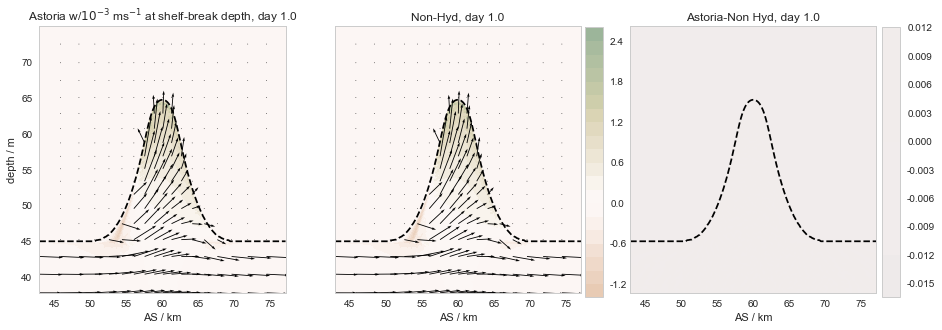

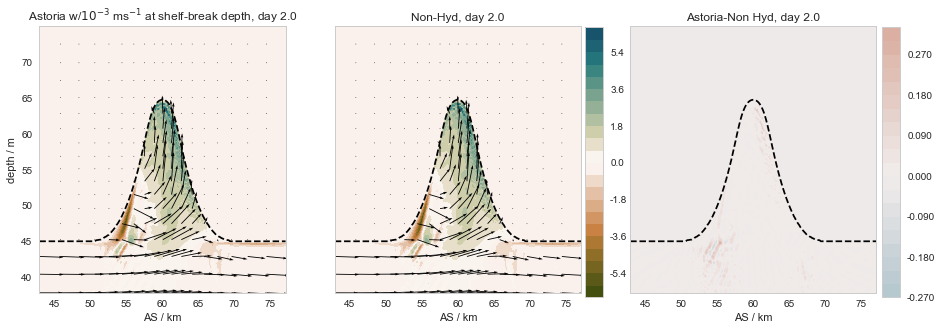

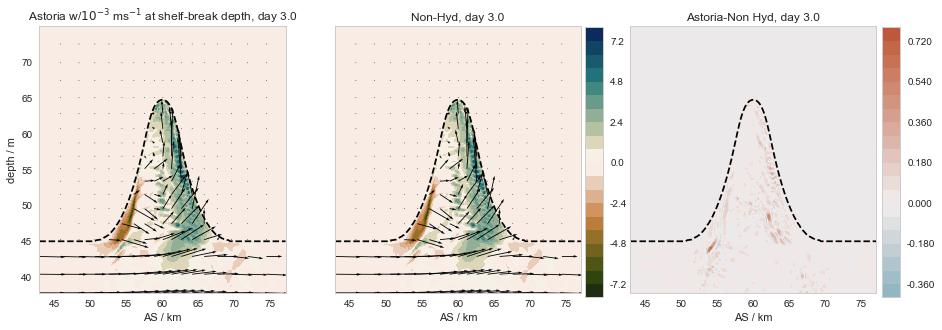

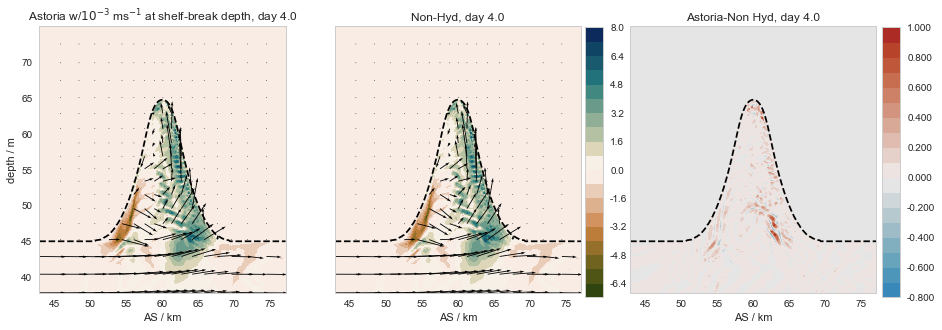

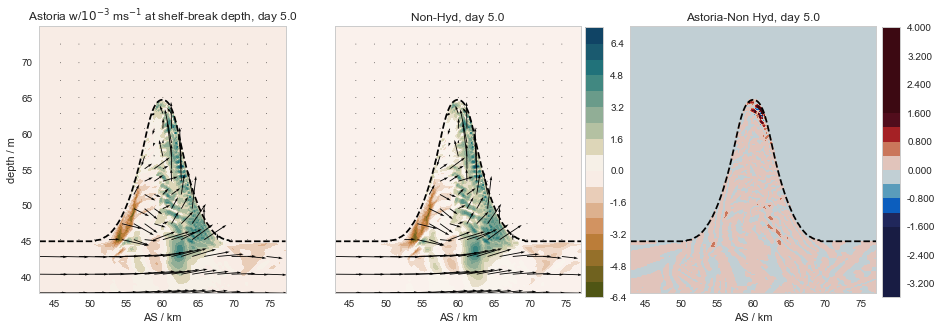

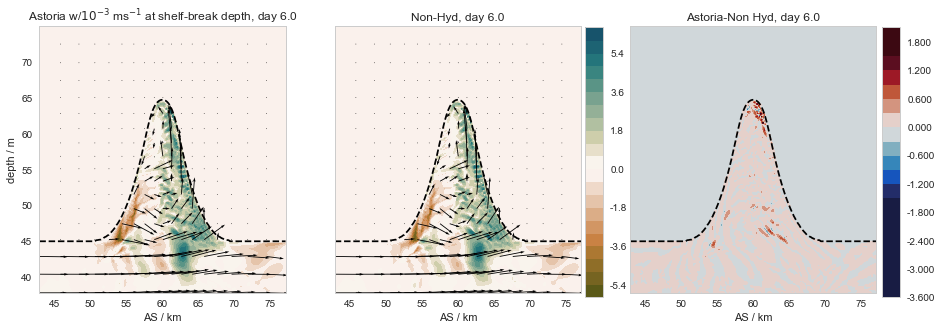

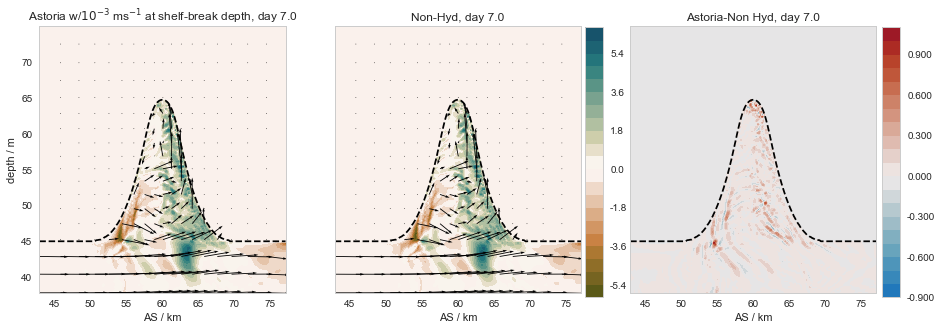

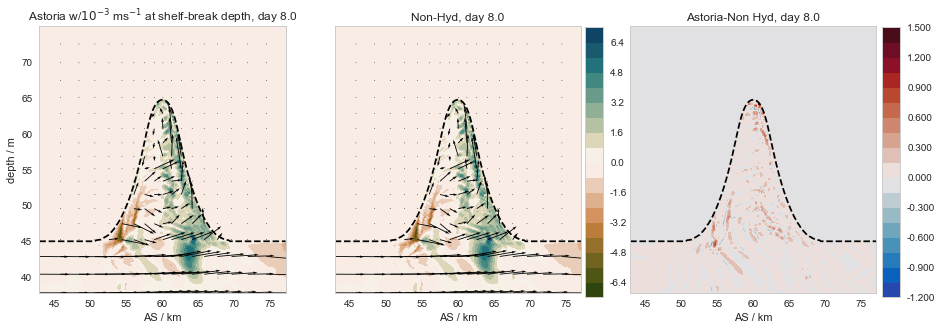

In [26]:
zind_Ast = 30

xslice = slice(90,270)
yslice = slice(100,270)

xslice_uns = slice(90,271)
yslice_uns = slice(100,271)

for tt in [2,4,6,8,10,12,14,16]:
    
    WAst = state.W.isel(T=tt,Zl=zind_Ast,Y=yslice,X=xslice)
    WAstNH = stateNH.W.isel(T=tt,Zl=zind_Ast,Y=yslice,X=xslice)
    
    U1 = state.U.isel(T=tt,Z=zind_Ast,Y=yslice,Xp1=xslice_uns)
    U2 = state.U.isel(T=tt,Z=zind_Ast,Y=yslice,Xp1=xslice_uns)
    
    V1 = stateNH.V.isel(T=tt,Z=zind_Ast,Yp1=yslice_uns,X=xslice)
    V2 = stateNH.V.isel(T=tt,Z=zind_Ast,Yp1=yslice_uns,X=xslice)
    
    UAst,VAst = rout.unstagger(U1,V1)
    UNH,VNH = rout.unstagger(U2,V2)
    
    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh=ax0.contourf(grid.X[xslice]/1000, grid.Y[yslice]/1000, WAst*1E3,20, 
                      cmap=cmo.cm.tarn,vmin=-8, vmax=8)
    ax0.contour(grid.X[xslice]/1000, grid.Y[yslice]/1000, -grid.Depth[yslice,xslice],
                [grid.Zl[zind_Ast]],colors='k')
    ax0.quiver(grid.X[xslice][::10]/1000, grid.Y[yslice][::10]/1000, UAst[::10,::10], VAst[::10,::10])
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('AS / km')
    ax0.set_aspect(1)
    cbar_ax = fig.add_axes([0.63, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%1.1f')

    ax1.contourf(grid.X[xslice]/1000, grid.Y[yslice]/1000, WAstNH*1E3,20, cmap=cmo.cm.tarn, 
                 vmin=-8, vmax=8)
    ax1.set_xlabel('AS / km')
    ax1.contour(grid.X[xslice]/1000, grid.Y[yslice]/1000, -grid.Depth[yslice,xslice],
                [grid.Zl[zind_Ast]],colors='k')
    ax1.quiver(grid.X[xslice][::10]/1000, grid.Y[yslice][::10]/1000, UNH[::10,::10], VNH[::10,::10])
    ax1.set_aspect(1)
    
    mesh2 = ax2.contourf(grid.X[xslice]/1000, grid.Y[yslice]/1000, (WAst-WAstNH)*1E3,20,
                 cmap=cmo.cm.balance, vmin=-1.5, vmax=1.5)
    ax2.contour(grid.X[xslice]/1000, grid.Y[yslice]/1000, -grid.Depth[yslice,xslice],
                [grid.Zl[zind_Ast]],colors='k')
    ax2.set_xlabel('AS / km')
    ax2.quiver(grid.X[xslice][::10]/1000, grid.Y[yslice][::10]/1000, 
               (UAst[::10,::10]-UNH[::10,::10]), (VAst[::10,::10]-VNH[::10,::10]))
    ax2.set_aspect(1)
    cbar_ax2 = fig.add_axes([0.905, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh2, cax=cbar_ax2, format='%1.3f')

    ax0.set_title('Astoria w/$10^{-3}$ ms$^{-1}$ at shelf-break depth, day %1.1f' %(tt/2))
    ax1.set_title('Non-Hyd, day %1.1f' %(tt/2))
    ax2.set_title('Astoria-Non Hyd, day %1.1f' %(tt/2))

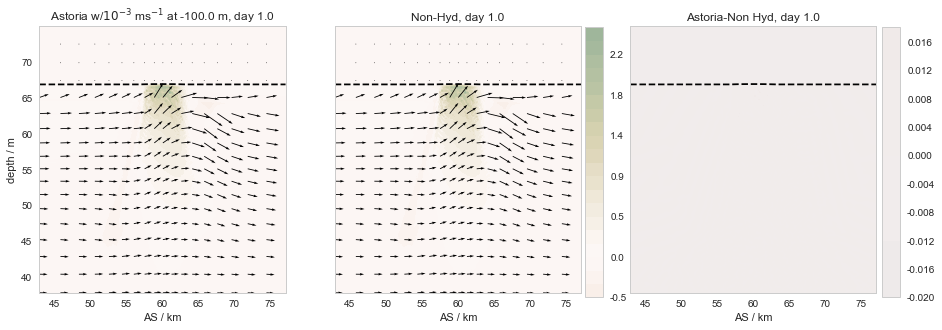

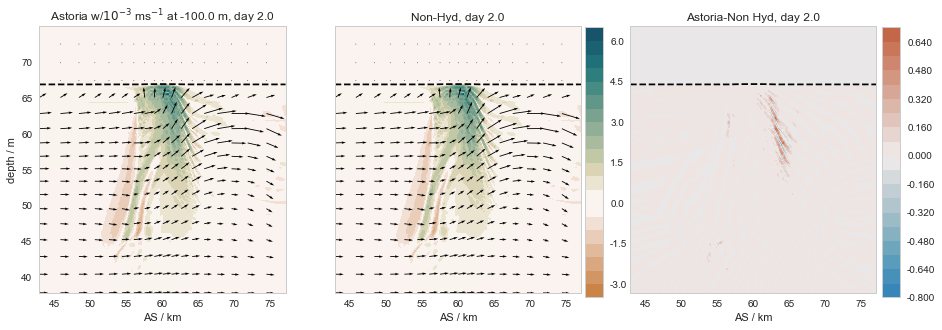

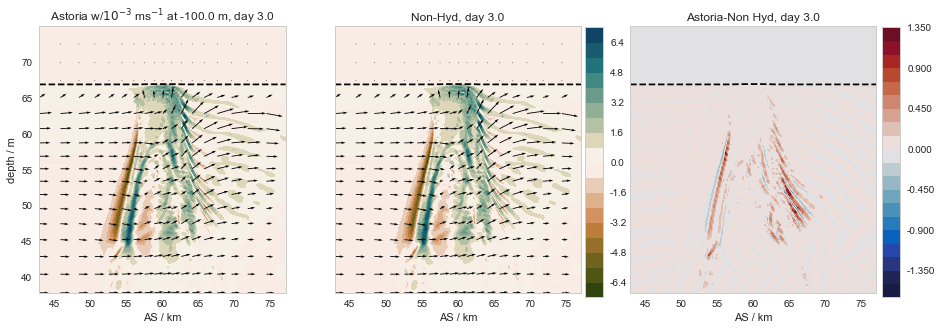

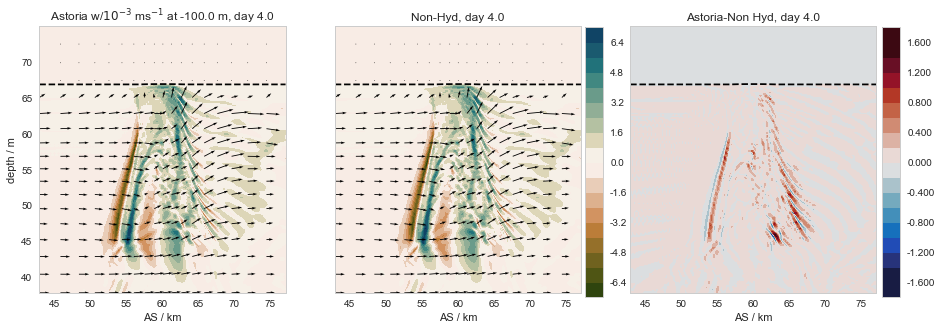

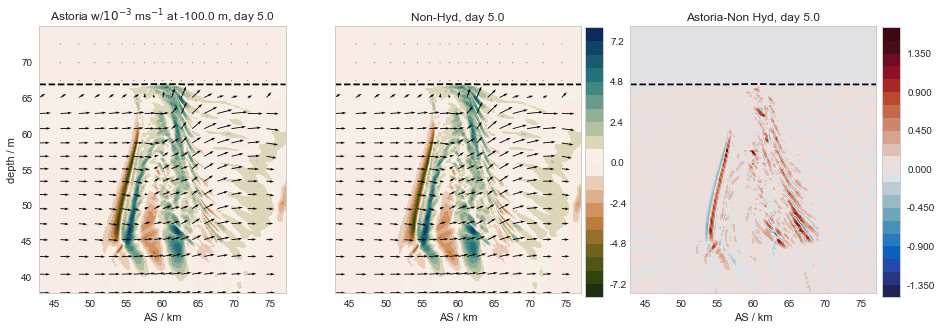

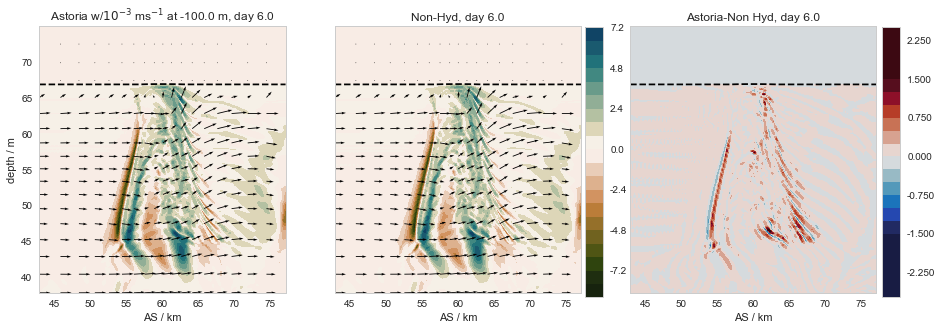

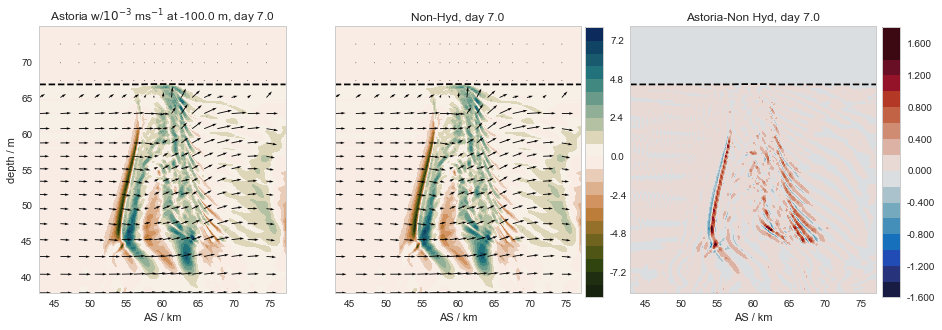

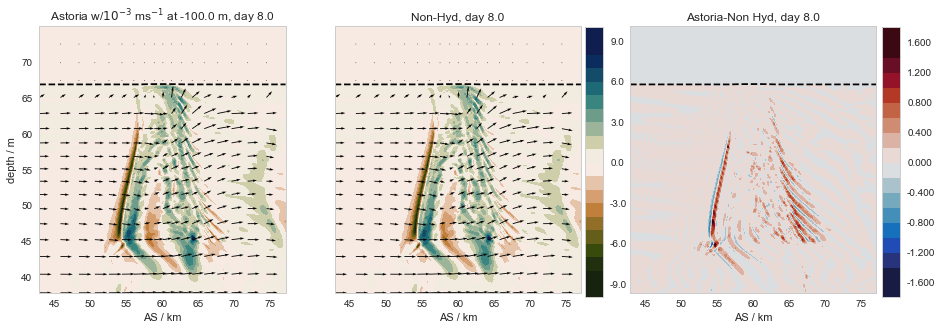

In [30]:
zind_Ast = 20

xslice = slice(90,270)
yslice = slice(100,270)

xslice_uns = slice(90,271)
yslice_uns = slice(100,271)

for tt in [2,4,6,8,10,12,14,16]:
    
    WAst = state.W.isel(T=tt,Zl=zind_Ast,Y=yslice,X=xslice)
    WAstNH = stateNH.W.isel(T=tt,Zl=zind_Ast,Y=yslice,X=xslice)
    
    U1 = state.U.isel(T=tt,Z=zind_Ast,Y=yslice,Xp1=xslice_uns)
    U2 = state.U.isel(T=tt,Z=zind_Ast,Y=yslice,Xp1=xslice_uns)
    
    V1 = stateNH.V.isel(T=tt,Z=zind_Ast,Yp1=yslice_uns,X=xslice)
    V2 = stateNH.V.isel(T=tt,Z=zind_Ast,Yp1=yslice_uns,X=xslice)
    
    UAst,VAst = rout.unstagger(U1,V1)
    UNH,VNH = rout.unstagger(U2,V2)
    
    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh=ax0.contourf(grid.X[xslice]/1000, grid.Y[yslice]/1000, WAst*1E3,20, 
                      cmap=cmo.cm.tarn,vmin=-8, vmax=8)
    ax0.contour(grid.X[xslice]/1000, grid.Y[yslice]/1000, -grid.Depth[yslice,xslice],
                [grid.Zl[zind_Ast]],colors='k')
    ax0.quiver(grid.X[xslice][::10]/1000, grid.Y[yslice][::10]/1000, UAst[::10,::10], VAst[::10,::10])
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('AS / km')
    ax0.set_aspect(1)
    cbar_ax = fig.add_axes([0.63, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%1.1f')

    ax1.contourf(grid.X[xslice]/1000, grid.Y[yslice]/1000, WAstNH*1E3,20, cmap=cmo.cm.tarn, vmin=-8, vmax=8)
    ax1.set_xlabel('AS / km')
    ax1.contour(grid.X[xslice]/1000, grid.Y[yslice]/1000, -grid.Depth[yslice,xslice],
                [grid.Zl[zind_Ast]],colors='k')
    ax1.quiver(grid.X[xslice][::10]/1000, grid.Y[yslice][::10]/1000, UNH[::10,::10], VNH[::10,::10])
    ax1.set_aspect(1)
    
    mesh2 = ax2.contourf(grid.X[xslice]/1000, grid.Y[yslice]/1000, (WAst-WAstNH)*1E3,20,
                 cmap=cmo.cm.balance, vmin=-1.5, vmax=1.5)
    ax2.contour(grid.X[xslice]/1000, grid.Y[yslice]/1000, -grid.Depth[yslice,xslice],
                [grid.Zl[zind_Ast]],colors='k')
    ax2.set_xlabel('AS / km')
    ax2.quiver(grid.X[xslice][::10]/1000, grid.Y[yslice][::10]/1000, 
               (UAst[::10,::10]-UNH[::10,::10]), (VAst[::10,::10]-VNH[::10,::10]))
    ax2.set_aspect(1)
    cbar_ax2 = fig.add_axes([0.905, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh2, cax=cbar_ax2, format='%1.3f')

    ax0.set_title('Astoria w/$10^{-3}$ ms$^{-1}$ at %1.1f m, day %1.1f' %(grid.Zl[zind_Ast],tt/2))
    ax1.set_title('Non-Hyd, day %1.1f' %(tt/2))
    ax2.set_title('Astoria-Non Hyd, day %1.1f' %(tt/2))

/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


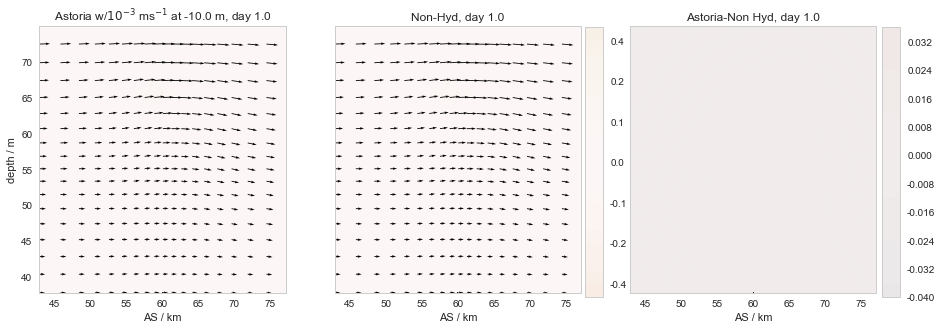

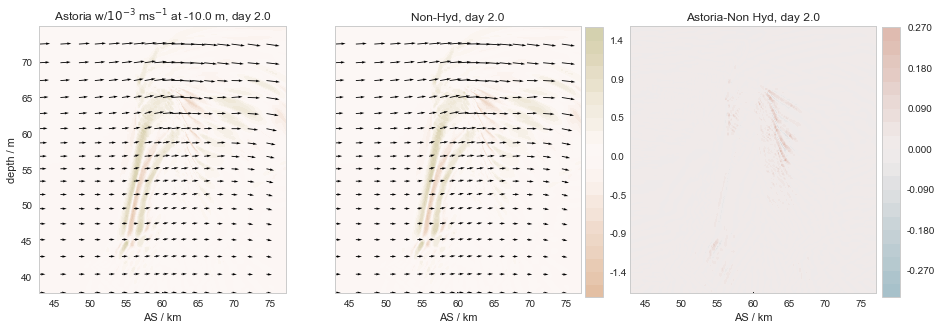

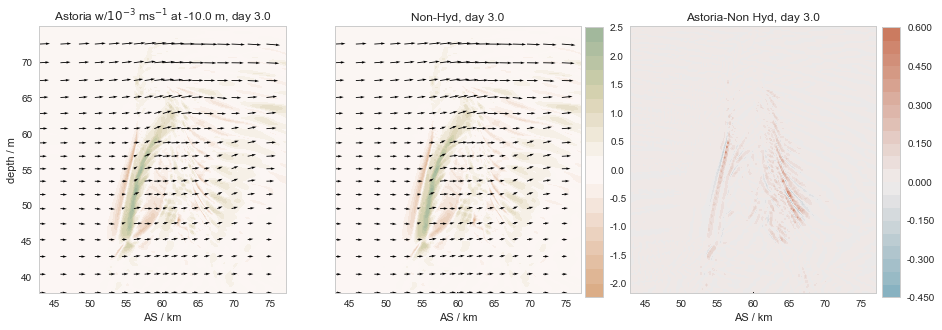

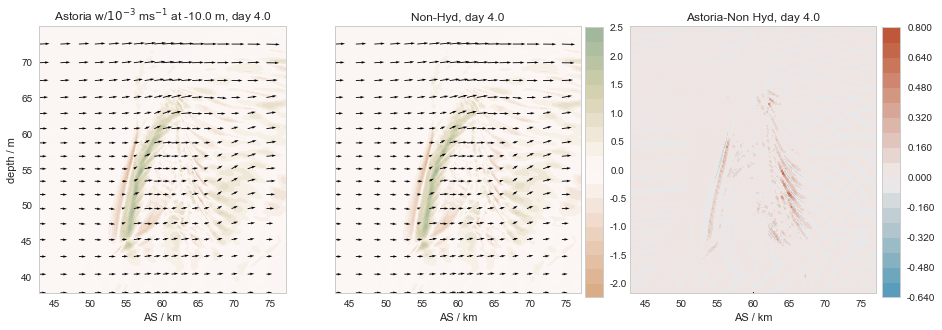

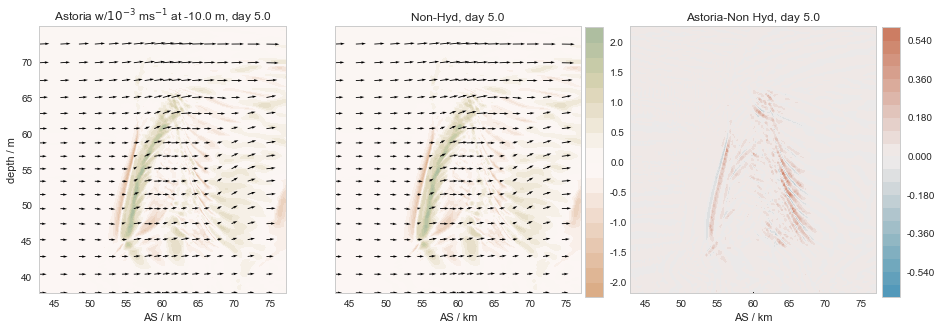

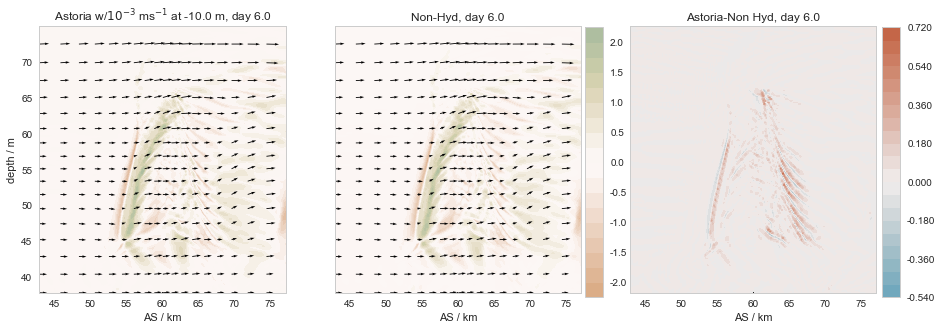

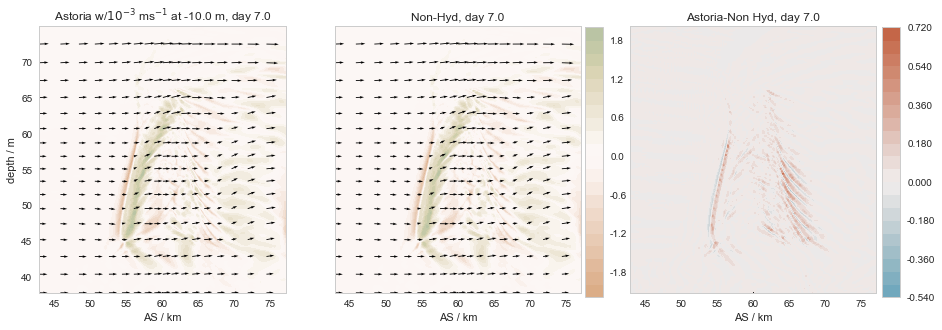

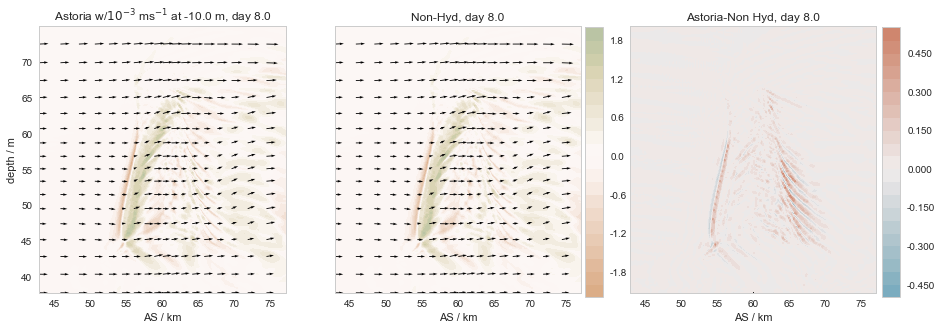

In [29]:
zind_Ast = 2

xslice = slice(90,270)
yslice = slice(100,270)

xslice_uns = slice(90,271)
yslice_uns = slice(100,271)

for tt in [2,4,6,8,10,12,14,16]:
    
    WAst = state.W.isel(T=tt,Zl=zind_Ast,Y=yslice,X=xslice)
    WAstNH = stateNH.W.isel(T=tt,Zl=zind_Ast,Y=yslice,X=xslice)
    
    U1 = state.U.isel(T=tt,Z=zind_Ast,Y=yslice,Xp1=xslice_uns)
    U2 = state.U.isel(T=tt,Z=zind_Ast,Y=yslice,Xp1=xslice_uns)
    
    V1 = stateNH.V.isel(T=tt,Z=zind_Ast,Yp1=yslice_uns,X=xslice)
    V2 = stateNH.V.isel(T=tt,Z=zind_Ast,Yp1=yslice_uns,X=xslice)
    
    UAst,VAst = rout.unstagger(U1,V1)
    UNH,VNH = rout.unstagger(U2,V2)
    
    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh=ax0.contourf(grid.X[xslice]/1000, grid.Y[yslice]/1000, WAst*1E3,20, 
                      cmap=cmo.cm.tarn,vmin=-8, vmax=8)
    ax0.contour(grid.X[xslice]/1000, grid.Y[yslice]/1000, -grid.Depth[yslice,xslice],
                [grid.Zl[zind_Ast]],colors='k')
    ax0.quiver(grid.X[xslice][::10]/1000, grid.Y[yslice][::10]/1000, UAst[::10,::10], VAst[::10,::10])
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('AS / km')
    ax0.set_aspect(1)
    cbar_ax = fig.add_axes([0.63, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%1.1f')

    ax1.contourf(grid.X[xslice]/1000, grid.Y[yslice]/1000, WAstNH*1E3,20, cmap=cmo.cm.tarn, vmin=-8, vmax=8)
    ax1.set_xlabel('AS / km')
    ax1.contour(grid.X[xslice]/1000, grid.Y[yslice]/1000, -grid.Depth[yslice,xslice],
                [grid.Zl[zind_Ast]],colors='k')
    ax1.quiver(grid.X[xslice][::10]/1000, grid.Y[yslice][::10]/1000, UNH[::10,::10], VNH[::10,::10])
    ax1.set_aspect(1)
    
    mesh2 = ax2.contourf(grid.X[xslice]/1000, grid.Y[yslice]/1000, (WAst-WAstNH)*1E3,20,
                 cmap=cmo.cm.balance, vmin=-1.5, vmax=1.5)
    ax2.contour(grid.X[xslice]/1000, grid.Y[yslice]/1000, -grid.Depth[yslice,xslice],
                [grid.Zl[zind_Ast]],colors='k')
    ax2.set_xlabel('AS / km')
    ax2.quiver(grid.X[xslice][::10]/1000, grid.Y[yslice][::10]/1000, 
               (UAst[::10,::10]-UNH[::10,::10]), (VAst[::10,::10]-VNH[::10,::10]))
    ax2.set_aspect(1)
    cbar_ax2 = fig.add_axes([0.905, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh2, cax=cbar_ax2, format='%1.3f')

    ax0.set_title('Astoria w/$10^{-3}$ ms$^{-1}$ at %1.1f m, day %1.1f' %(grid.Zl[zind_Ast], tt/2))
    ax1.set_title('Non-Hyd, day %1.1f' %(tt/2))
    ax2.set_title('Astoria-Non Hyd, day %1.1f' %(tt/2))